In [1]:
import pandas as pd

In [2]:
df = pd.read_json("medicamentos.json")
df.head()

,totalRegistros,medicamentos
0,17808,"{'apresentacoes': [{'codigo': 1587717, 'aprese..."
1,17808,"{'apresentacoes': [{'codigo': 2061908, 'aprese..."
2,17808,"{'apresentacoes': [{'codigo': 1743337, 'aprese..."
3,17808,"{'apresentacoes': [{'codigo': 404393311, 'apre..."
4,17808,"{'apresentacoes': [{'codigo': 1708796, 'aprese..."


In [3]:
df_meds = pd.json_normalize(df['medicamentos'])
df_meds.head(5)

,apresentacoes,id,codigo,numeroRegistro,nomeProduto,numeroProcesso,empresaNome,empresaCnpj,principioAtivo,tarja,...,bula_txt,bula_pdf,bula_txt_profissional,bula_pdf_profissional,categoriaRegulatoria,situacaoRegistro,dataProduto,dataVencimentoRegistro,dataPublicacao,indicacao
0,"[{'codigo': 1587717, 'apresentacao': '0,8 MG/M...",1,1012584,188300060,ácido zoledrônico,25351771065201417,VIATRIS FARMACEUTICA DO BRASIL LTDA,11643096000122,ÁCIDO ZOLEDRÔNICO MONOIDRATADO,Vermelha sob restrição,...,\n\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n...,repo/storage/25351771065201417_paciente.pdf,\n\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n...,repo/storage/25351771065201417_profissional.pdf,Genérico,ATIVO,2018-10-01T03:00:00.000Z,2028-10-01T03:00:00.000Z,2024-08-07T11:18:54.000Z,
1,"[{'codigo': 2061908, 'apresentacao': '150 MG C...",2,1595612,123520278,ácido ursodesoxicólico,25351843204202031,RANBAXY FARMACÊUTICA LTDA,73663650000190,ÁCIDO URSODESOXICÓLICO,Vermelha,...,\n\n ...,repo/storage/25351843204202031_paciente.pdf,\n\n ...,repo/storage/25351843204202031_profissional.pdf,Genérico,ATIVO,2020-10-26T03:00:00.000Z,2030-07-01T03:00:00.000Z,2024-12-19T13:42:22.000Z,
2,"[{'codigo': 1743337, 'apresentacao': '250 MG C...",3,1250613,109740258,ácido valpróico,25351114943201805,BIOLAB SANUS FARMACÊUTICA LTDA,49475833000106,"VALPROATO DE SÓDIO, ÁCIDO VALPRÓICO",Vermelha sob restrição,...,\n\n \n \n \n \n \n \n \n \n \n \n \n \n \náci...,repo/storage/25351114943201805_paciente.pdf,\n\n \n \n \n \n \n \n \n \n \n \n \n \nácido ...,repo/storage/25351114943201805_profissional.pdf,Genérico,ATIVO,2018-05-28T03:00:00.000Z,2028-05-01T03:00:00.000Z,2024-12-12T11:57:27.000Z,
3,"[{'codigo': 404393311, 'apresentacao': '20 MG/...",4,3482995,118190298,ácido fusídico + valerato de betametasona,25351063014202207,MULTILAB INDUSTRIA E COMERCIO DE PRODUTOS FARM...,92265552000905,"ÁCIDO FUSÍDICO, VALERATO DE BETAMETASONA",Vermelha sob restrição,...,\n\n \n \n \n \n \n \n \n \n \n \n \n \n \náci...,repo/storage/25351063014202207_paciente.pdf,\n\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n...,repo/storage/25351063014202207_profissional.pdf,Genérico,ATIVO,2022-08-08T03:00:00.000Z,2029-10-01T03:00:00.000Z,2024-06-06T20:53:54.000Z,
4,"[{'codigo': 1708796, 'apresentacao': '20 MG CO...",5,1177203,100431217,ÉSIO,25351318508201769,EUROFARMA LABORATÓRIOS S.A.,61190096000192,ESOMEPRAZOL MAGNÉSICO,Vermelha,...,\n\n \nÉsio_com rev lib retard_VP_V04 \n ...,repo/storage/25351318508201769_paciente.pdf,\n\n \nÉsio_com rev lib retard_VPS_V04 \n \n ...,repo/storage/25351318508201769_profissional.pdf,Similar,ATIVO,2017-07-17T03:00:00.000Z,2027-07-01T03:00:00.000Z,2021-08-30T14:06:57.000Z,


In [4]:
df_exploded = df['medicamentos'].apply(lambda x: x['apresentacoes']).explode()
df_exploded

0        {'codigo': 1587717, 'apresentacao': '0,8 MG/ML...
0        {'codigo': 1754347, 'apresentacao': '0,8 MG/ML...
0        {'codigo': 1754348, 'apresentacao': '0,8 MG/ML...
1        {'codigo': 2061908, 'apresentacao': '150 MG CO...
1        {'codigo': 2061909, 'apresentacao': '150 MG CO...
                               ...                        
17803                                                 None
17804                                                 None
17805                                                 None
17806                                                 None
17807                                                 None
Name: medicamentos, Length: 60767, dtype: object

In [5]:
df_final = pd.json_normalize(df_exploded)
df_final.head()

,codigo,apresentacao,formasFarmaceuticas,numero,tonalidade,dataPublicacao,validade,tipoValidade,registro,principiosAtivos,...,medicamentoReferencia,apresentacaoFracionada,dataVencimentoRegistro,tipoAutorizacao,ativa,emAnalise,inativa,embalagemSecundaria.tipo,embalagemSecundaria.observacao,embalagemSecundaria
0,1587717.0,"0,8 MG/ML SOL INJ IV CT FA VD TRANS X 5 ML",[SOLUÇAO INJETAVEL],1.0,NaN,2018-10-01T00:00:00.000-0300,24,2,1883000600015,[ácido zoledrônico monoidratado],...,N,N,NaN,REGISTRADO,True,False,False,Cartucho,Cartucho de cartolina,NaN
1,1754347.0,"0,8 MG/ML SOL INJ IV CT 4 FA VD TRANS X 5 ML",[SOLUÇAO INJETAVEL],2.0,NaN,2018-10-01T00:00:00.000-0300,24,2,1883000600023,[ácido zoledrônico monoidratado],...,N,N,NaN,REGISTRADO,True,False,False,Cartucho,Cartucho de cartolina,NaN
2,1754348.0,"0,8 MG/ML SOL INJ IV CT 10 FA VD TRANS X 5 ML",[SOLUÇAO INJETAVEL],3.0,NaN,2018-10-01T00:00:00.000-0300,24,2,1883000600031,[ácido zoledrônico monoidratado],...,N,N,NaN,REGISTRADO,True,False,False,Cartucho,Cartucho de cartolina,NaN
3,2061908.0,150 MG COM CT STR AL X 20,[Comprimido],1.0,NaN,2020-10-26T00:00:00.000-0300,36,2,1235202780016,[ÁCIDO URSODESOXICÓLICO],...,N,N,NaN,REGISTRADO,True,False,False,Cartucho,Cartucho de Cartolina,NaN
4,2061909.0,150 MG COM CT STR AL X 30,[Comprimido],2.0,NaN,2020-10-26T00:00:00.000-0300,36,2,1235202780024,[ÁCIDO URSODESOXICÓLICO],...,N,N,NaN,REGISTRADO,True,False,False,Cartucho,Cartucho de Cartolina,NaN


In [6]:
print("Número de filas:", df_final.shape[0])
print("Número de columnas:", df_final.shape[1])
print(f"Tamaño en memoria: {df_final.memory_usage(deep=True).sum() / (1024**2):.2f} MB")
print(f"Columnas: {df_final.columns.tolist()}")
print(f"cantidad de columnas por tipo: \n {df_final.dtypes.value_counts()}")


Número de filas: 60767
Número de columnas: 39
Tamaño en memoria: 112.85 MB
Columnas: ['codigo', 'apresentacao', 'formasFarmaceuticas', 'numero', 'tonalidade', 'dataPublicacao', 'validade', 'tipoValidade', 'registro', 'principiosAtivos', 'complemento', 'qtdUnidadeMedida', 'embalagemPrimaria', 'embalagemPrimariaTodas', 'embalagemSecundariaTodas', 'envoltorios', 'acessorios', 'acondicionamento', 'marcas', 'fabricantesNacionais', 'fabricantesInternacionais', 'viasAdministracao', 'ifaUnico', 'conservacao', 'restricaoPrescricao', 'restricaoUso', 'destinacao', 'restricaoHospitais', 'tarja', 'medicamentoReferencia', 'apresentacaoFracionada', 'dataVencimentoRegistro', 'tipoAutorizacao', 'ativa', 'emAnalise', 'inativa', 'embalagemSecundaria.tipo', 'embalagemSecundaria.observacao', 'embalagemSecundaria']
cantidad de columnas por tipo: 
 object     32
float64     7
Name: count, dtype: int64


In [7]:
print(f"Numero de nulos por columna: {df_final.isnull().sum()}")


Numero de nulos por columna: codigo                            12049
apresentacao                      12049
formasFarmaceuticas               12049
numero                            12049
tonalidade                        60767
dataPublicacao                    12049
validade                          12100
tipoValidade                      12100
registro                          12146
principiosAtivos                  12049
complemento                       58649
qtdUnidadeMedida                  38207
embalagemPrimaria                 60767
embalagemPrimariaTodas            12049
embalagemSecundariaTodas          12049
envoltorios                       12049
acessorios                        12049
acondicionamento                  60767
marcas                            12049
fabricantesNacionais              12049
fabricantesInternacionais         12049
viasAdministracao                 12049
ifaUnico                          12049
conservacao                       12049
restricaoPr

In [8]:
print(f"% de nulos por columna: {(df_final.isnull().mean() * 100).round(2)}")


% de nulos por columna: codigo                             19.83
apresentacao                       19.83
formasFarmaceuticas                19.83
numero                             19.83
tonalidade                        100.00
dataPublicacao                     19.83
validade                           19.91
tipoValidade                       19.91
registro                           19.99
principiosAtivos                   19.83
complemento                        96.51
qtdUnidadeMedida                   62.87
embalagemPrimaria                 100.00
embalagemPrimariaTodas             19.83
embalagemSecundariaTodas           19.83
envoltorios                        19.83
acessorios                         19.83
acondicionamento                  100.00
marcas                             19.83
fabricantesNacionais               19.83
fabricantesInternacionais          19.83
viasAdministracao                  19.83
ifaUnico                           19.83
conservacao                      

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


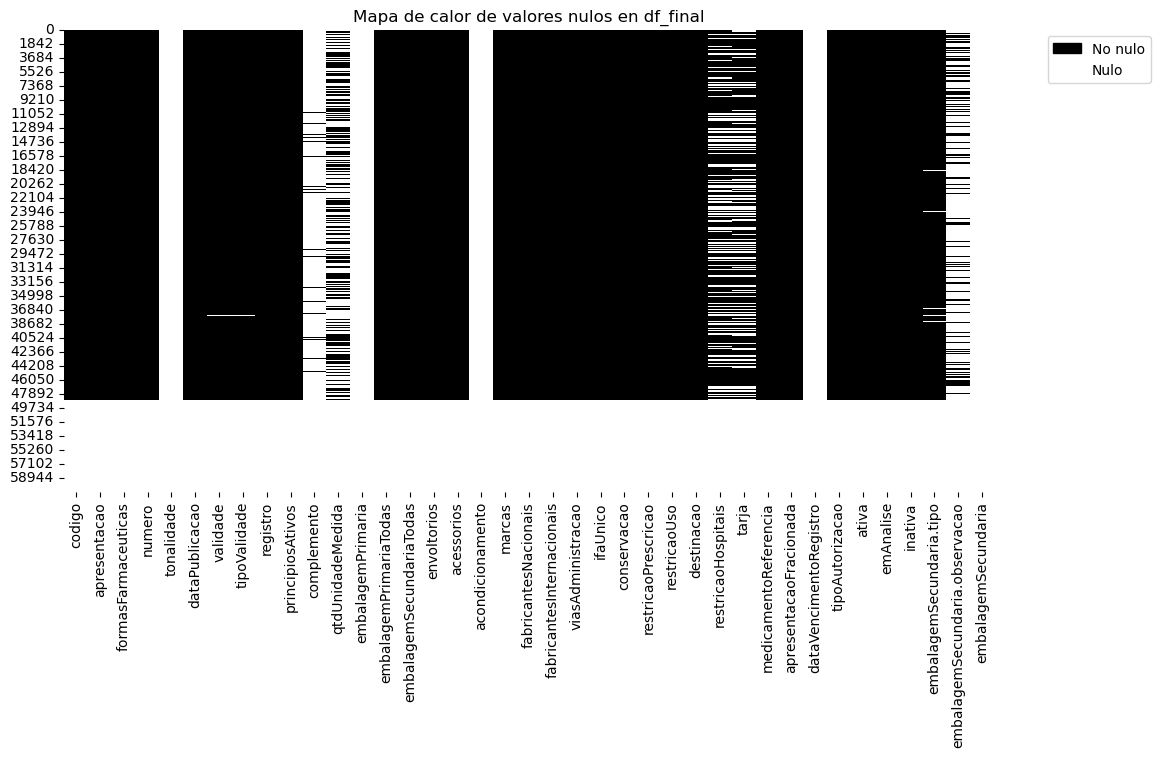

In [10]:
null_matrix = df_final.isnull()

# Usamos seaborn heatmap
plt.figure(figsize=(12,6)) 
sns.heatmap(null_matrix, 
            cmap=["black","white"], 
            cbar=False)
plt.title("Mapa de calor de valores nulos en df_final")
blue_patch = mpatches.Patch(color='black', label='No nulo')
white_patch = mpatches.Patch(color='white', label='Nulo')
plt.legend(handles=[blue_patch, white_patch], 
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()